# Projeto Ciência de Dados - Previsão de Vendas

- O desafio é conseguir prever as vendas de um determinado período com base nos gastos em anúncios nas 3 grandes redes que uma empresa fictícia investe: TV, jornal e rádio.
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões de reais

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importando a Base de dados

In [32]:
import pandas as pd

tabela = pd.read_csv("../data/advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


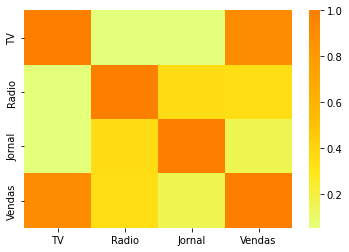

In [33]:
import seaborn as sbn
import matplotlib.pyplot as plt

display(tabela.corr())

# Criar gráfico utilizando seaborn
sbn.heatmap(tabela.corr(), cmap="Wistia")

# Utilizando o pyplot para exibir o gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [34]:
# x -> valores conhecidos
# y -> valor a ser previsto

x = tabela[["TV", "Radio", "Jornal"]]
y = tabela["Vendas"]

# Importando função que separa a base de dados em dados para treino e dados para teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [35]:
# Importando modelos de predição
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criando modelos (inteligência artificial) utilizando regressão linear e árvore de decisão
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()

# Treinando os modelos
modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da inteligência artificial e avaliação do melhor modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [36]:
# Realizando predições utilizando os modelos treinados
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

# Importando o medidor de fator R^2 (fator de exatidão/acurácia do modelo)
from sklearn.metrics import r2_score

# Mostrando em tela o fator R^2 obtido para cada modelo treinado
print(r2_score(y_teste, previsao_regressao_linear))
print(r2_score(y_teste, previsao_arvore_decisao))

0.8900446717134075
0.9561069622521304


#### Visualização gráfica das previsões

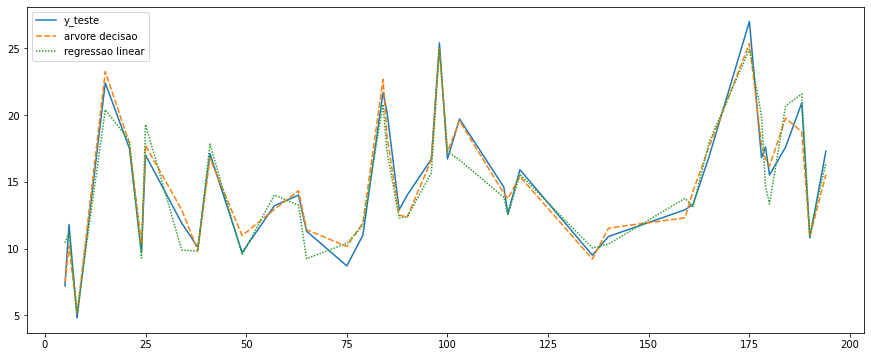

In [37]:
# Criando tabela com o pandas
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["arvore decisao"] = previsao_arvore_decisao
tabela_auxiliar["regressao linear"] = previsao_regressao_linear

plt.figure(figsize=(15, 6))
sbn.lineplot(data=tabela_auxiliar)
plt.show()

#### Fazendo uma nova previsão

In [38]:
# Lendo os novos valores da nova base de dados
tabela_novos = pd.read_csv("../data/new_data.csv")
print(tabela_novos)

      TV  Radio  Jornal
0   23.1    3.8    69.2
1   44.5    0.0     5.1
2  170.2   45.9     0.0


In [39]:
# Mostrando os valores das novas predições
print(modelo_arvore_decisao.predict(tabela_novos))

[ 7.805  8.647 19.777]
